In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
print(np.__version__)

1.20.1


In [6]:
print(pd.__version__)


1.2.4


In [7]:
print(tf.__version__)

2.8.0


In [8]:
print(sns.__version__)

0.11.1


In [9]:
print(matplotlib.__version__)

3.3.4


In [10]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Rupesh37/3.-Police-Data/main/sendtorupeshagain.csv")
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,US_inflation_rate,US_interest_rate,Unemployment_rate,Prev_day_close_price,Percentage_Change
0,1,Bitcoin,BTC,30-04-2013 23:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,1.1,0.15,7.6,144.54,-0.038
1,2,Bitcoin,BTC,01-05-2013 23:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,1.4,0.11,7.5,139.00,-0.158
2,3,Bitcoin,BTC,02-05-2013 23:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,1.4,0.11,7.5,116.99,-0.101
3,4,Bitcoin,BTC,03-05-2013 23:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,1.4,0.11,7.5,105.21,-0.071
4,5,Bitcoin,BTC,04-05-2013 23:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09,1.4,0.11,7.5,97.75,0.151


In [11]:
dataset.drop(["SNo","Name","Symbol","Date"],axis=1,inplace=True)
dataset

,High,Low,Open,Close,Volume,Marketcap,US_inflation_rate,US_interest_rate,Unemployment_rate,Prev_day_close_price,Percentage_Change
0,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.1,0.15,7.6,144.54,-0.038
1,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.4,0.11,7.5,139.00,-0.158
2,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.4,0.11,7.5,116.99,-0.101
3,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.4,0.11,7.5,105.21,-0.071
4,115.000000,92.500000,98.099998,112.500000,0.000000e+00,1.250317e+09,1.4,0.11,7.5,97.75,0.151
...,...,...,...,...,...,...,...,...,...,...,...
2985,33939.588700,32770.680780,33549.600180,33897.048590,3.872897e+10,6.354510e+11,5.4,0.10,5.4,33572.12,0.010
2986,34909.259900,33402.696540,33854.421360,34668.548400,2.438396e+10,6.499400e+11,5.4,0.10,5.4,33897.05,0.023
2987,35937.567150,34396.477460,34665.564870,35287.779770,2.492431e+10,6.615750e+11,5.4,0.10,5.4,34668.55,0.018
2988,35284.344430,33213.661030,35284.344430,33746.002460,2.672155e+10,6.326960e+11,5.4,0.10,5.4,35287.78,-0.044


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   High                  2990 non-null   float64
 1   Low                   2990 non-null   float64
 2   Open                  2990 non-null   float64
 3   Close                 2990 non-null   float64
 4   Volume                2990 non-null   float64
 5   Marketcap             2990 non-null   float64
 6   US_inflation_rate     2990 non-null   float64
 7   US_interest_rate      2990 non-null   float64
 8   Unemployment_rate     2990 non-null   float64
 9   Prev_day_close_price  2990 non-null   float64
 10  Percentage_Change     2990 non-null   float64
dtypes: float64(11)
memory usage: 257.1 KB


In [13]:
dataset.describe()

,High,Low,Open,Close,Volume,Marketcap,US_inflation_rate,US_interest_rate,Unemployment_rate,Prev_day_close_price,Percentage_Change
count,2990.000000,2990.000000,2990.000000,2990.000000,2.990000e+03,2.990000e+03,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,6895.582172,6488.133956,6702.342127,6713.486681,1.090998e+10,1.209160e+11,1.635886,0.742886,5.406656,6702.085110,0.002739
std,11644.125960,10870.229051,11289.292884,11299.393126,1.889106e+10,2.109679e+11,0.965050,0.809804,1.886039,11288.807741,0.042646
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,-0.200000,0.050000,3.500000,68.430000,-0.372000
25%,436.657005,422.922485,430.655991,430.918991,3.048558e+07,6.309822e+09,1.100000,0.090000,4.000000,430.570000,-0.013000
50%,2392.390014,2180.859986,2279.109986,2295.694946,9.480075e+08,3.755274e+10,1.700000,0.360000,5.000000,2279.920000,0.002000
75%,8735.453709,8292.635093,8571.748109,8577.107249,1.594585e+10,1.500110e+11,2.100000,1.420000,6.200000,8571.880000,0.019000
max,64863.098910,62208.964370,63523.754870,63503.457930,3.509680e+11,1.186360e+12,5.400000,2.420000,14.700000,63503.460000,0.430000


In [14]:
dataset.isnull().value_counts()

High   Low    Open   Close  Volume  Marketcap  US_inflation_rate  US_interest_rate  Unemployment_rate  Prev_day_close_price  Percentage_Change
False  False  False  False  False   False      False              False             False              False                 False                2990
dtype: int64

In [15]:
print(len(dataset))

2990


In [16]:
split_row = len(dataset) - int(0.2 * len(dataset))
train_data = dataset.iloc[:split_row]
test_data = dataset.iloc[split_row:]

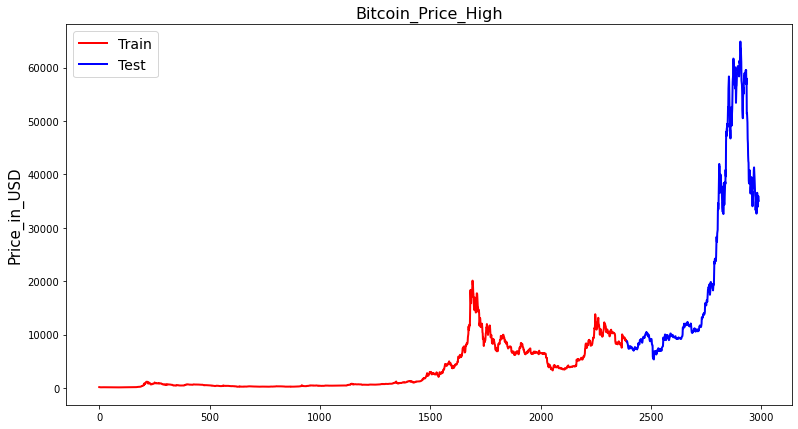

In [17]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['High'], label='Train', linewidth=2,color='r')
ax.plot(test_data['High'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Price_in_USD', fontsize=15)
ax.set_title('Bitcoin_Price_High', fontsize=16)
ax.legend(loc='best', fontsize=14)

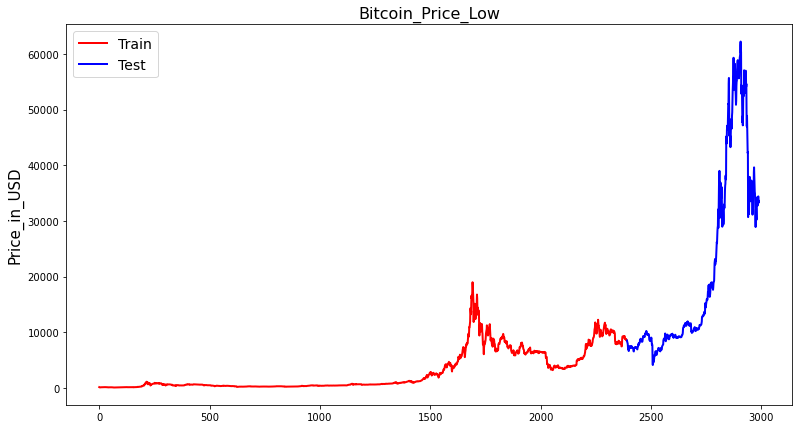

In [18]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['Low'], label='Train', linewidth=2,color='r')
ax.plot(test_data['Low'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Price_in_USD', fontsize=15)
ax.set_title('Bitcoin_Price_Low', fontsize=16)
ax.legend(loc='best', fontsize=14)

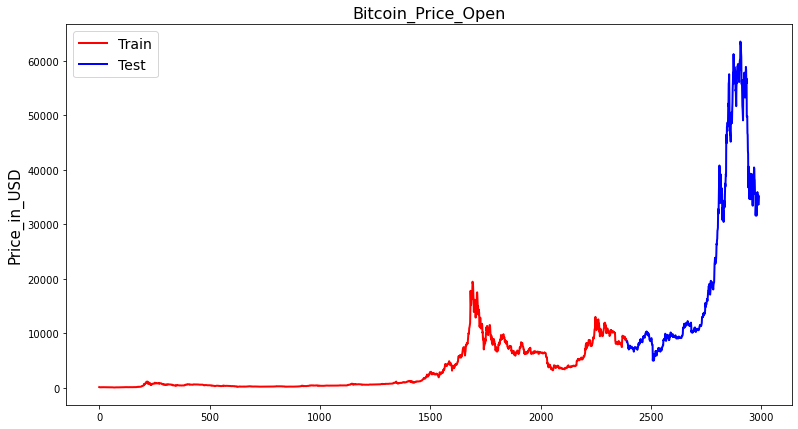

In [20]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['Open'], label='Train', linewidth=2,color='r')
ax.plot(test_data['Open'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Price_in_USD', fontsize=15)
ax.set_title('Bitcoin_Price_Open', fontsize=16)
ax.legend(loc='best', fontsize=14)

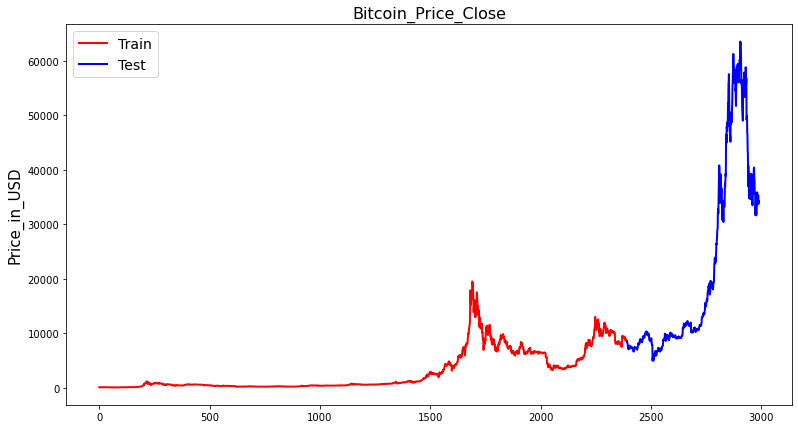

In [21]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['Close'], label='Train', linewidth=2,color='r')
ax.plot(test_data['Close'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Price_in_USD', fontsize=15)
ax.set_title('Bitcoin_Price_Close', fontsize=16)
ax.legend(loc='best', fontsize=14)

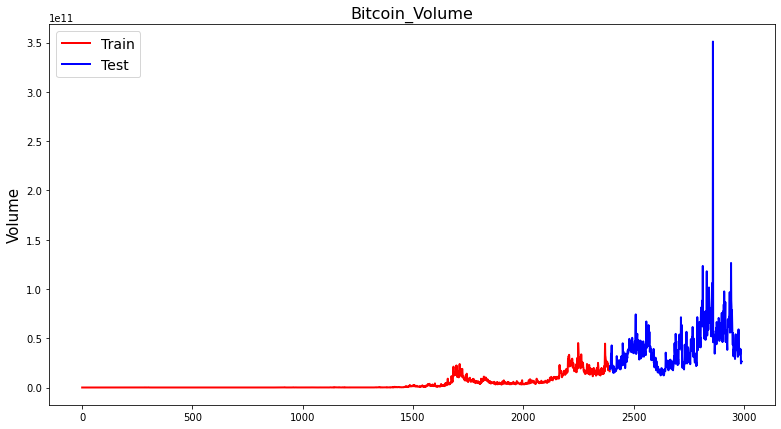

In [22]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['Volume'], label='Train', linewidth=2,color='r')
ax.plot(test_data['Volume'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Volume', fontsize=15)
ax.set_title('Bitcoin_Volume', fontsize=16)
ax.legend(loc='best', fontsize=14)

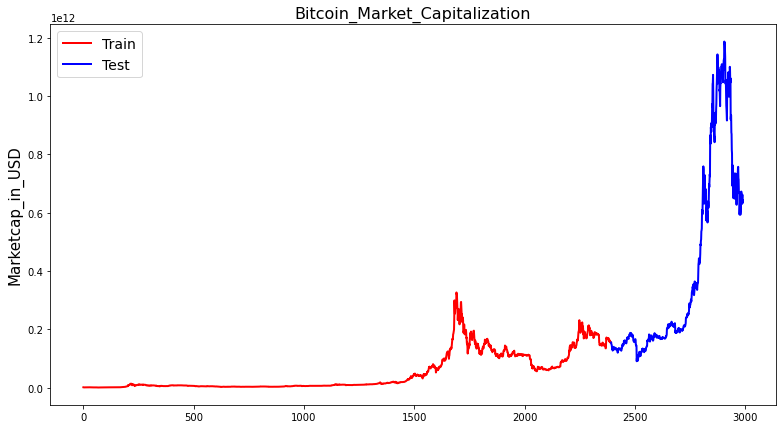

In [23]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['Marketcap'], label='Train', linewidth=2,color='r')
ax.plot(test_data['Marketcap'], label='Test', linewidth=2,color='b')
ax.set_ylabel('Marketcap_in_USD', fontsize=15)
ax.set_title('Bitcoin_Market_Capitalization', fontsize=16)
ax.legend(loc='best', fontsize=14)

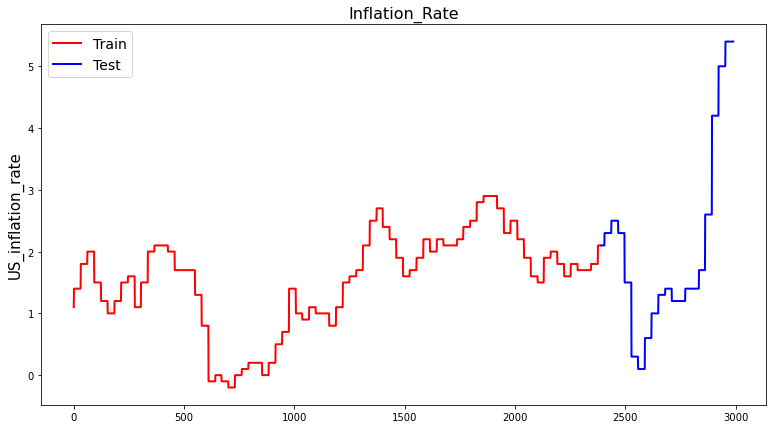

In [24]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data['US_inflation_rate'], label='Train', linewidth=2,color='r')
ax.plot(test_data['US_inflation_rate'], label='Test', linewidth=2,color='b')
ax.set_ylabel('US_inflation_rate', fontsize=15)
ax.set_title('Inflation_Rate', fontsize=16)
ax.legend(loc='best', fontsize=14)

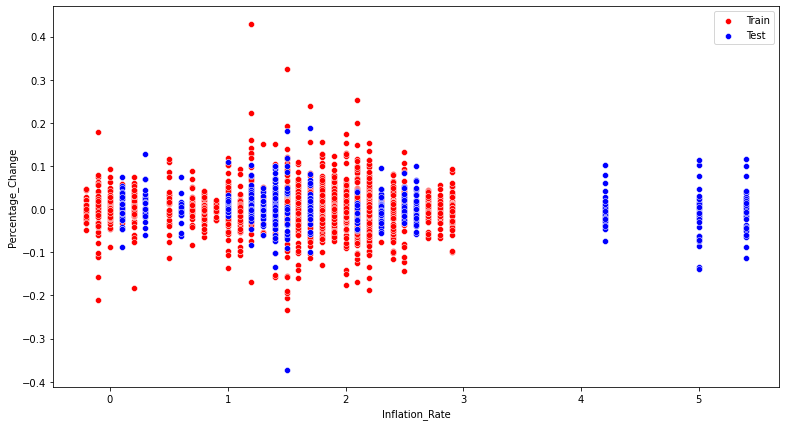

In [25]:
fig, ax = plt.subplots(1, figsize=(13,7))
sns.scatterplot(x=train_data['US_inflation_rate'],y=train_data['Percentage_Change'],data=dataset,label='Train',color='r')
sns.scatterplot(x=test_data['US_inflation_rate'],y=test_data['Percentage_Change'],data=dataset,label='Test',color='b')
plt.xlabel('Inflation_Rate')
plt.ylabel('Percentage_Change')
plt.legend()
plt.show()

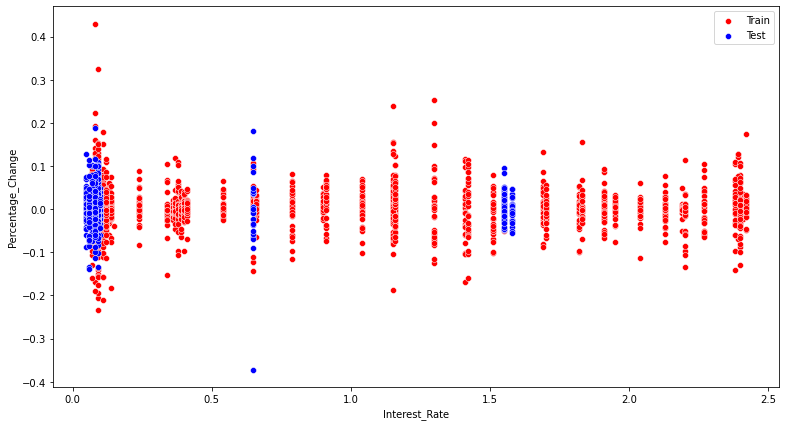

In [26]:
fig, ax = plt.subplots(1, figsize=(13,7))
sns.scatterplot(x=train_data['US_interest_rate'],y=train_data['Percentage_Change'],data=dataset,label='Train',color='r')
sns.scatterplot(x=test_data['US_interest_rate'],y=test_data['Percentage_Change'],data=dataset,label='Test',color='b')
plt.xlabel('Interest_Rate')
plt.ylabel('Percentage_Change')
plt.legend()
plt.show()

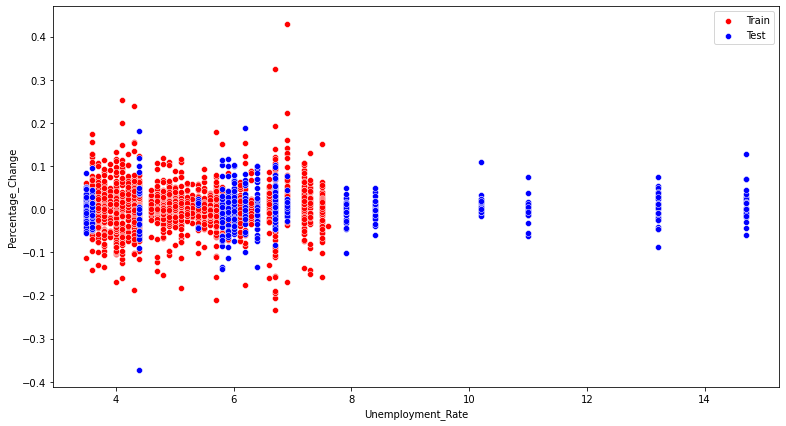

In [29]:
fig, ax = plt.subplots(1, figsize=(13,7))
sns.scatterplot(x=train_data['Unemployment_rate'],y=train_data['Percentage_Change'],data=dataset,label='Train',color='r')
sns.scatterplot(x=test_data['Unemployment_rate'],y=test_data['Percentage_Change'],data=dataset,label='Test',color='b')
plt.xlabel('Unemployment_Rate')
plt.ylabel('Percentage_Change')
plt.legend()
plt.show()

In [30]:
X  = train_data.drop(['Close'],axis=1)
y = train_data['Close']

In [31]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=101)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.fit_transform(X_cv)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()

model.add(Dense(24,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(24,activation='relu'))




model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [36]:
from keras.callbacks import EarlyStopping
clb = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

In [37]:
model.fit(X_train, y_train,validation_data=(X_cv,y_cv),batch_size=64,epochs=100,verbose=1,callbacks=[clb],shuffle=True)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 23429420.0000 - val_loss: 21265252.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 23372586.0000 - val_loss: 21132628.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 22890550.0000 - val_loss: 20029060.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 19705988.0000 - val_loss: 13003184.0000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7143903.0000 - val_loss: 421625.9688
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1555037.1250 - val_loss: 300285.6562
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1266481.8750 - val_loss: 288433.6562
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1344867.7500 - val_loss: 243902.7500
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1245552.8750 - val_loss: 219530.140

<AxesSubplot:>

<Figure size 2160x720 with 0 Axes>

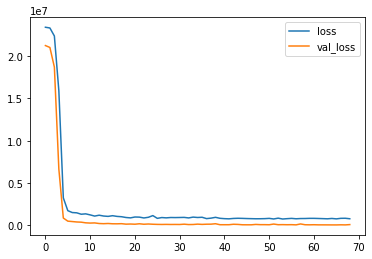

In [71]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(30,10))
loss.plot()

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                264       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dropout_6 (Dropout)         (None, 24)                0         
                                                                 
 dense_9 (Dense)             (None, 24)               

In [38]:
X_test = test_data.drop(['Close'],axis=1)
y_test = test_data['Close']

In [39]:
X_test = np.asarray(X).astype(np.float32)
y_test = np.asarray(y).astype(np.float32)

In [40]:
X_test = scaler.fit_transform(X_test)


In [41]:
predicted_price = model.predict(X_test)
real_price = y_test

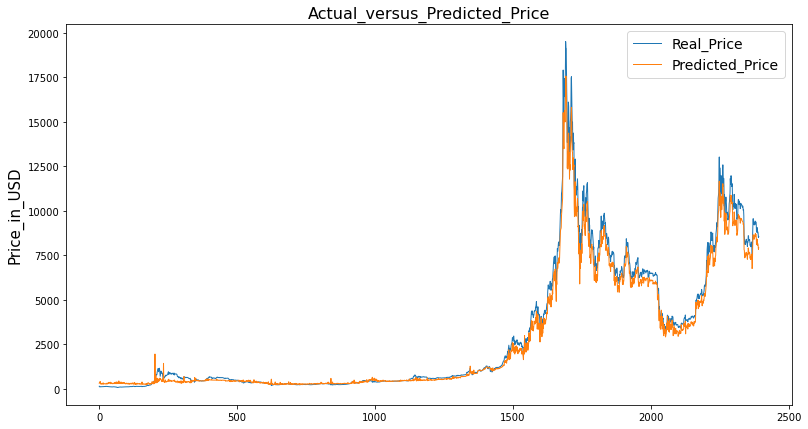

In [42]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real_Price', linewidth=1)
ax.plot(predicted_price, label='Predicted_Price', linewidth=1)
ax.set_ylabel('Price_in_USD', fontsize=15)
ax.set_title('Actual_versus_Predicted_Price', fontsize=16)
ax.legend(loc='best', fontsize=14)

In [43]:
from sklearn.metrics import mean_absolute_error

In [79]:
mean_abs_error = mean_absolute_error(real_price,predicted_price)
mean_abs_error

143.1404